---
# Logistic Regression
# Heart Failure

<hr><h4>13 Feb 2023

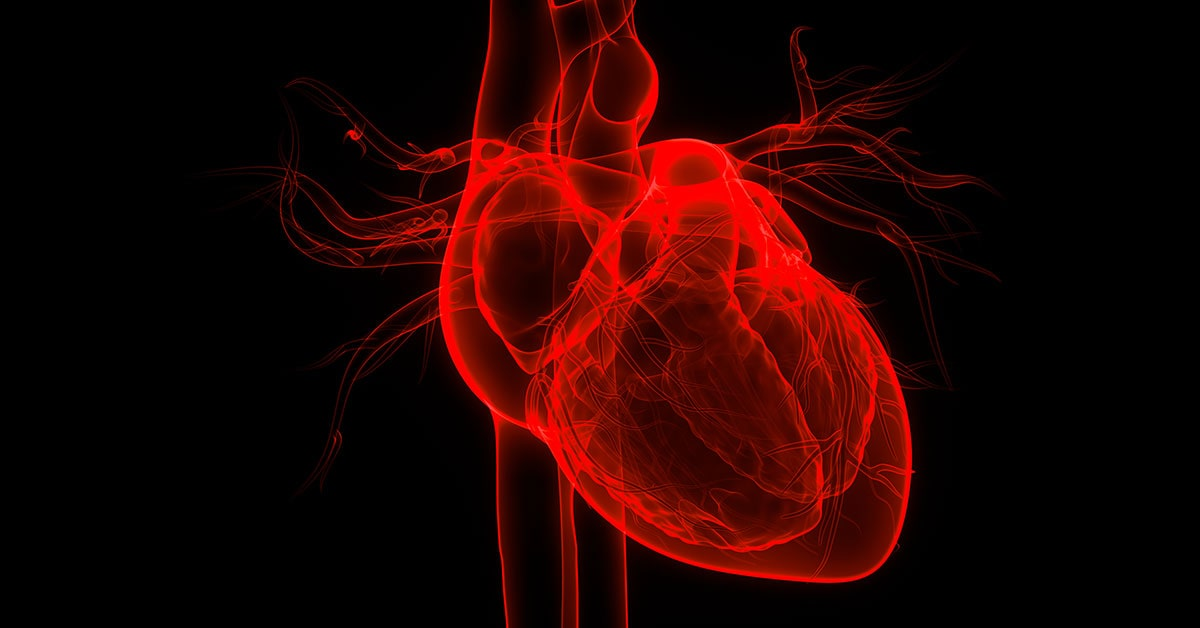

### Dataset
 With 17.9 million deaths per year, or 31% of all deaths worldwide, cardiovascular diseases (CVDs) are the leading cause of death worldwide.
This dataset comprises 12 variables that can be used to predict death from heart failure, which is a typical event brought on by CVDs.

By addressing behavioral risk factors like cigarette use, unhealthy eating and obesity, inactivity, and problematic alcohol use with population-wide measures, the majority of cardiovascular illnesses can be avoided.

A machine learning model can aid in the early detection and management of people with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such hypertension, diabetes, hyperlipidaemia, or previously established disease).

[- Authors](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)



<hr>

In [2]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

In [3]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

In [4]:
input_ = "1.csv"
data = pd.read_csv(input_)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Visualization

### Distribution of high_blood_pressure


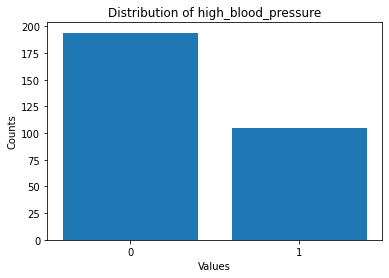

In [8]:
high_blood_pressure_c = data["high_blood_pressure"].value_counts()
plt.bar(np.arange(2), high_blood_pressure_c, align='center')
plt.xticks(np.arange(2), high_blood_pressure_c.index)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of high_blood_pressure')
plt.show()

### Distribution of diabetes

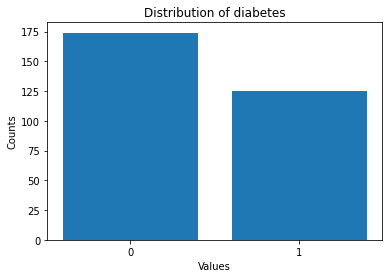

In [9]:
diabetes_c = data["diabetes"].value_counts()
plt.bar(np.arange(2), diabetes_c, align='center')
plt.xticks(np.arange(2), diabetes_c.index)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of diabetes')
plt.show()

### Distribution of smoking

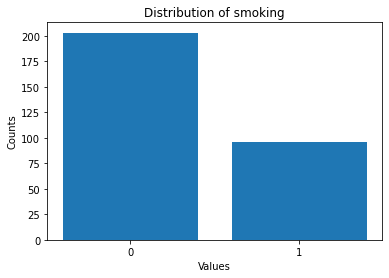

In [10]:
smoke_c = data["smoking"].value_counts()
plt.bar(np.arange(2), smoke_c, align='center')
plt.xticks(np.arange(2), smoke_c.index)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of smoking')
plt.show()

### Distribution of Death

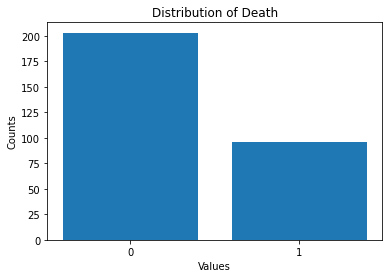

In [11]:
death_c = data["DEATH_EVENT"].value_counts()
plt.bar(np.arange(2), death_c, align='center')
plt.xticks(np.arange(2), death_c.index)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of Death')
plt.show()

### Distribution of sex

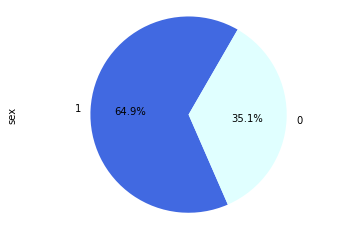

In [12]:
data['sex'].value_counts().plot.pie(colors =['royalblue','lightcyan'],autopct='%.1f%%',startangle=60)
plt.axis('equal')
plt.show()


### Distribution of Smoking based on Death event

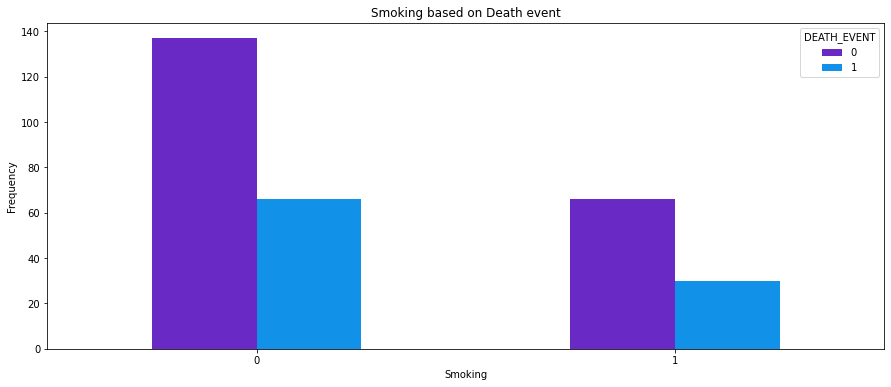

In [13]:
pd.crosstab(data.smoking,data.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Smoking based on Death event')
plt.xlabel('Smoking')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Distribution of high_blood_pressure based on Death event

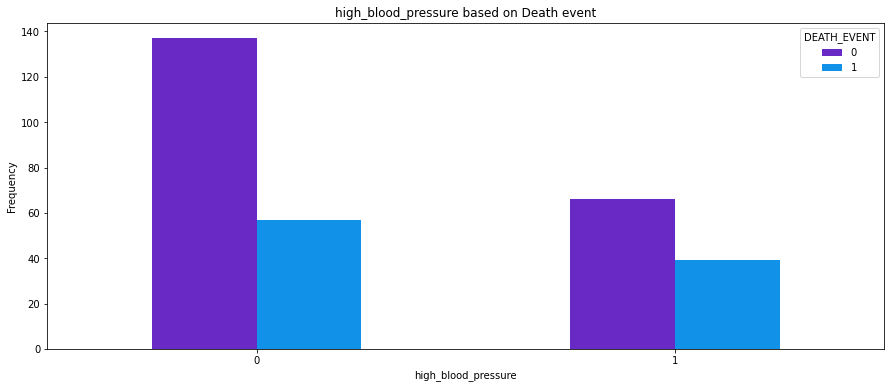

In [14]:
pd.crosstab(data.high_blood_pressure,data.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('high_blood_pressure based on Death event')
plt.xlabel('high_blood_pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Distribution of Diabetes based on Death event

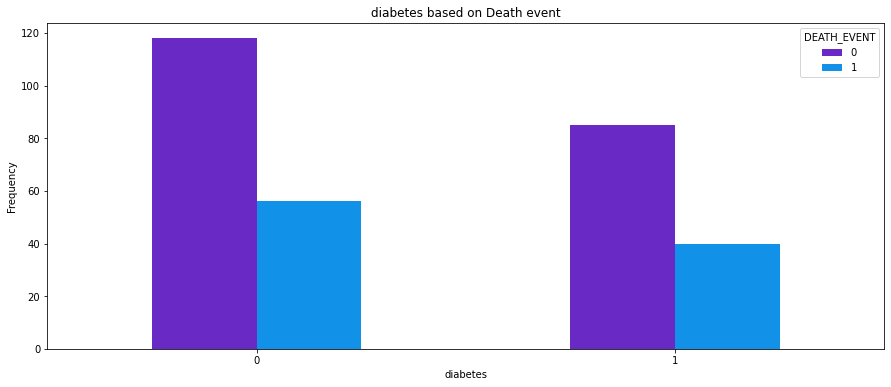

In [15]:
pd.crosstab(data.diabetes,data.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('diabetes based on Death event')
plt.xlabel('diabetes')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Distribution of Sex based on Death event

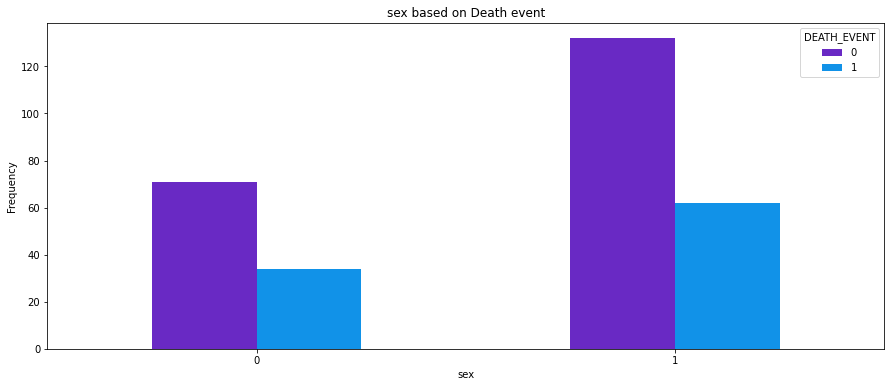

In [16]:
pd.crosstab(data.sex,data.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('sex based on Death event')
plt.xlabel('sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Distribution of age based on Death event

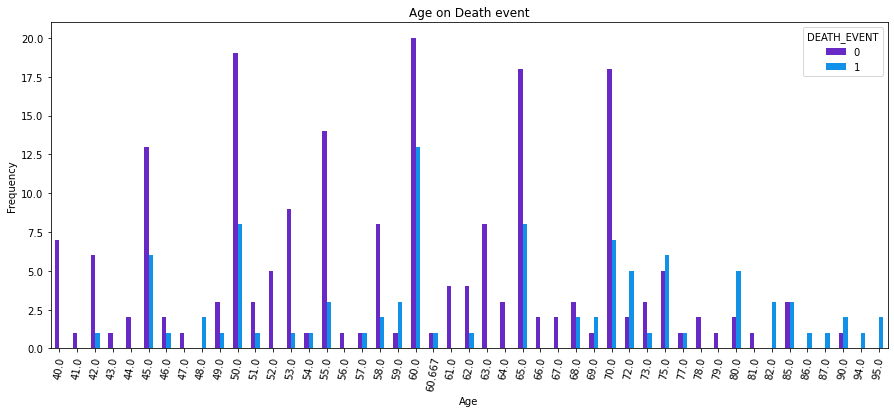

In [17]:
pd.crosstab(data.age,data.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Age on Death event')
plt.xlabel('Age')
plt.xticks(rotation=80)
plt.ylabel('Frequency')
plt.show()

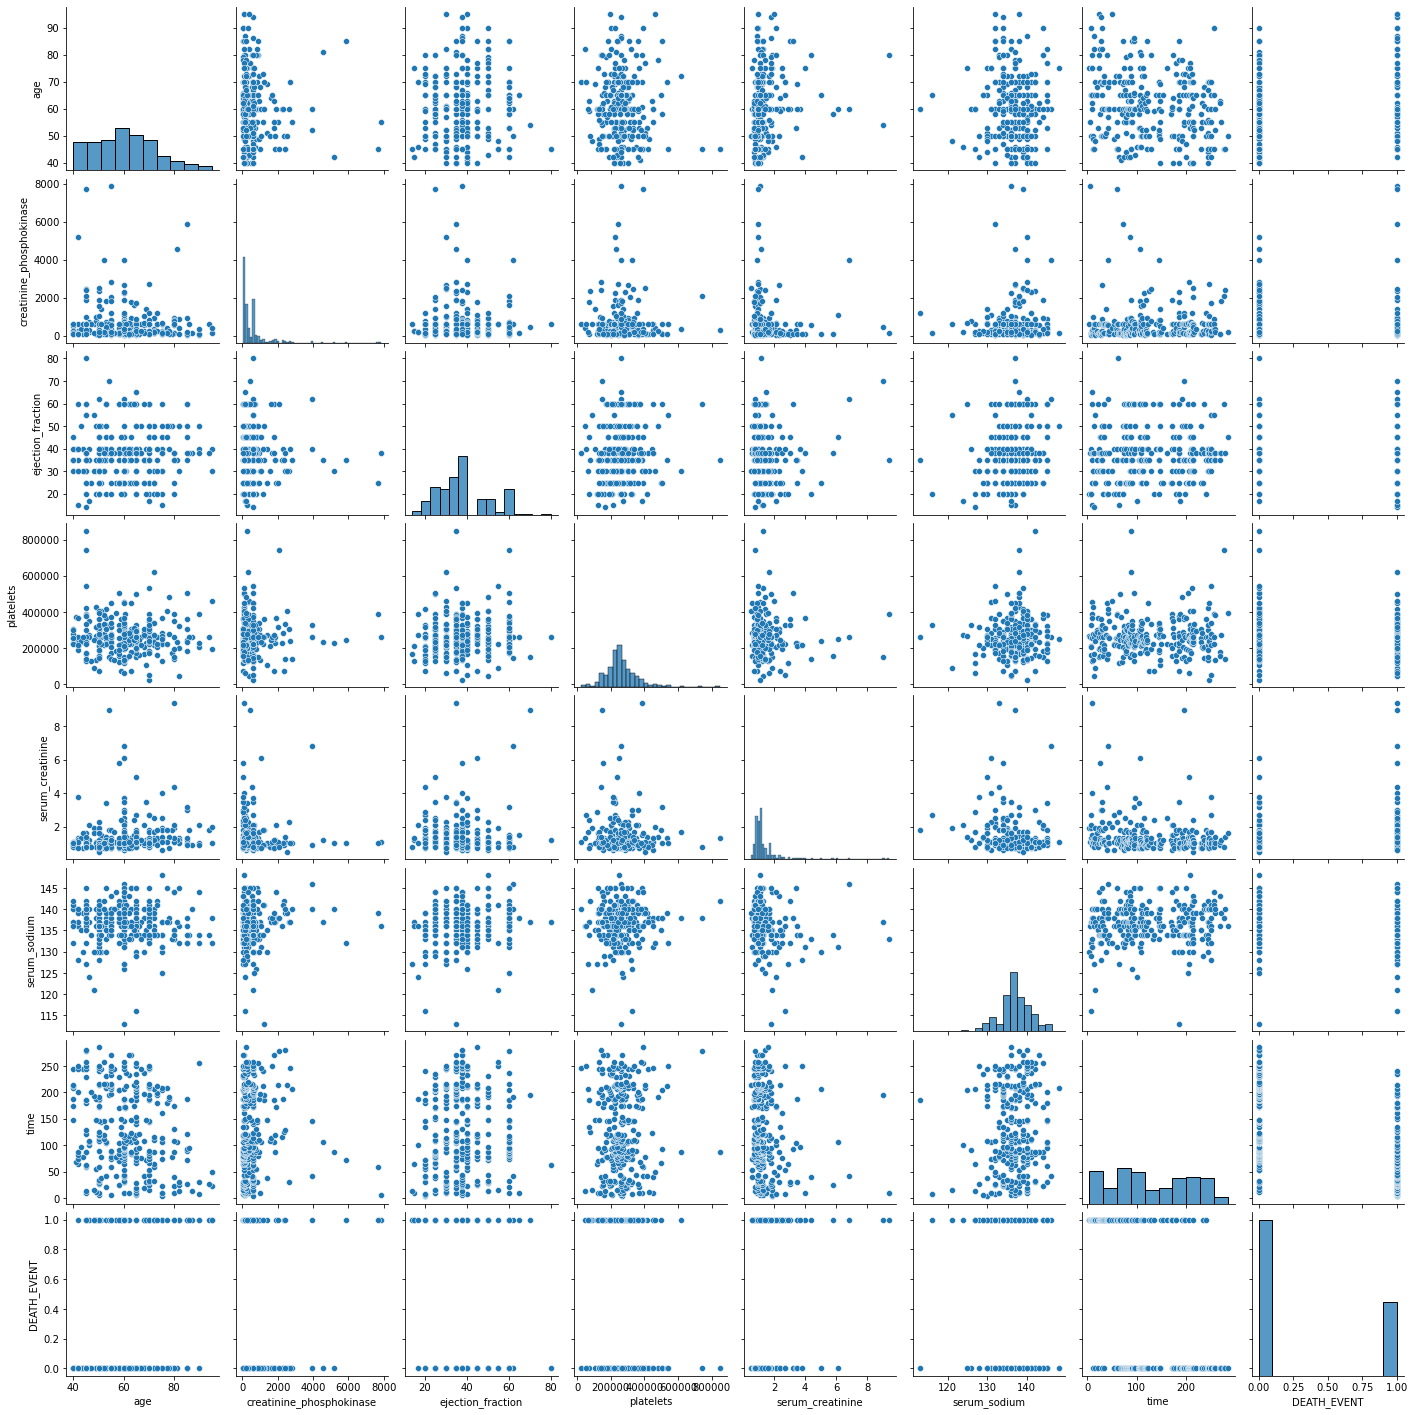

In [18]:
sns.pairplot(data[['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium','time',
       'DEATH_EVENT']])

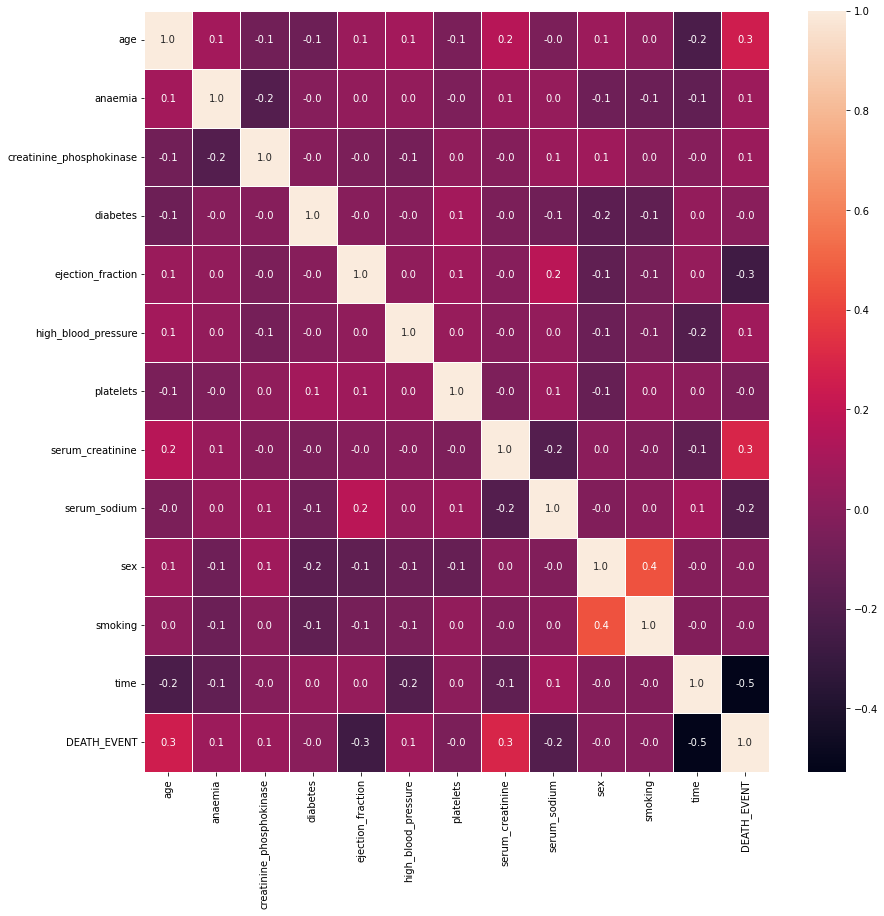

In [19]:
plt.subplots(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt=".1f")
plt.show()

There is positive correlation between Death and 'age' 'serum_creatinine'

# Model Construction

In [20]:
def standardize(x):
    ''' Standardize the pixel values by subtracting the mean and dividing by the standard deviation '''
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

Separating dependent and independent variables then spliting to test and training sets

In [21]:
X = data.drop(data[['DEATH_EVENT']], axis=1)
y = data[['DEATH_EVENT']].to_numpy()

X = standardize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def weightInitialization(n_features):
    w = np.zeros((1, n_features))
    b = 0
    return w,b

In [23]:
def sigmoid(result):
    result = 1/(1 + np.exp(-result))
    return result

Cost formula

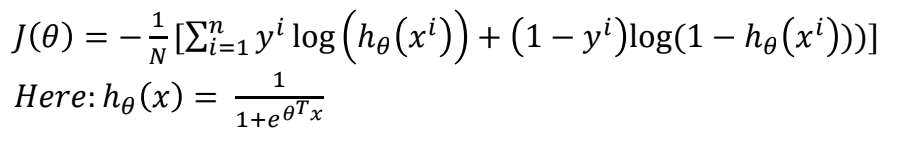

In [24]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    # Prediction
    result = sigmoid(np.dot(w,X.T) + b)
    cost = (-1/m)*(np.sum(Y.T * np.log(result)) + ((1-Y.T) * (np.log(1-result))))
    
    # Gradient Calculation
    dw = (1/m)*(np.dot(X.T, (result-Y.T).T))
    db = (1/m)*(np.sum(result-Y.T))
    
    grads = {
        "dw": dw,
        "db": db
    }
    
    return grads, cost

Gradient Descent is a way to minimise the cost function. We use the derivative of the cost function in the gradient descent algorithm.

Gradient descent formula for linear regression. We take theta, then subtract the derivative of the cost function that is also multiplies by a tuned alpha learning rate. We repeat this until convergence.

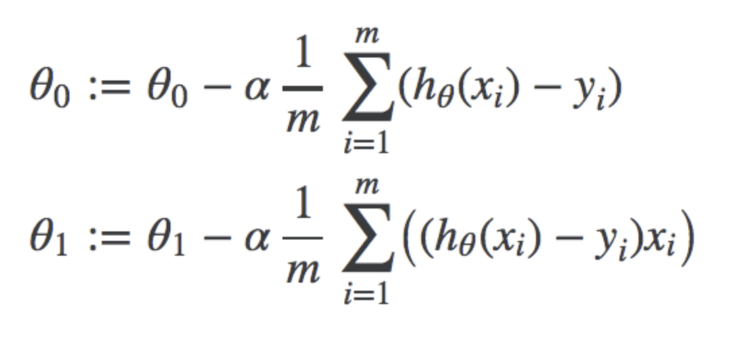

In [25]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w - (learning_rate * dw.T)
        b = b - (learning_rate * db)
        
        if (i % 100 == 0):
            costs.append(cost)
            
    # final parameters
    coeff = {"w":w, "b":b}
    gradient = {"dw":dw, "db":db}
    
    return coeff, gradient, costs

In [26]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [27]:
# Get number of features
n_features = X_train.shape[1]
print('Number of Features: {}'.format(n_features))

w, b = weightInitialization(n_features)
# Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_train, y_train.reshape(-1,1), learning_rate=0.0001,no_iterations=10000)
# Final Prediction
w = coeff['w']
b = coeff['b']
print('Optimized weights: {}'.format(w))
print('Optimized intercept: {}'.format(b))

final_train_pred = sigmoid(np.dot(w,X_train.T)+b)
final_test_pred = sigmoid(np.dot(w,X_test.T)+b)


Number of Features: 12
Optimized weights: [[ 0.10652428  0.01742152  0.01604021  0.00750166 -0.1032013   0.01876627
  -0.01844861  0.12254529 -0.06210796 -0.02120451 -0.01258233 -0.21675754]]
Optimized intercept: -0.17956872928989479


## Evaluation Metrics for Classification.

In [28]:
y_train_pred = predict(final_train_pred, X_train.shape[0])
print('Training Accuracy             : {:.4f}'.format(metrics.accuracy_score(y_train_pred.T, y_train)))

y_test_pred = predict(final_test_pred, X_test.shape[0])
print('Test Accuracy                 : {:.4f}'.format(metrics.accuracy_score(y_test_pred.T, y_test)))

print('Logistic Regression f1-score  : {:.4f}'.format(metrics.f1_score(y_test_pred.T, y_test)))
print('Logistic Regression precision : {:.4f}'.format(metrics.precision_score(y_test_pred.T, y_test)))
print('Logistic Regression recall    : {:.4f}'.format(metrics.recall_score(y_test_pred.T, y_test)))
print("\n",metrics.classification_report(y_test_pred.T, y_test))

Training Accuracy             : 0.8577
Test Accuracy                 : 0.8167
Logistic Regression f1-score  : 0.7317
Logistic Regression precision : 0.6000
Logistic Regression recall    : 0.9375

               precision    recall  f1-score   support

         0.0       0.97      0.77      0.86        44
         1.0       0.60      0.94      0.73        16

    accuracy                           0.82        60
   macro avg       0.79      0.86      0.80        60
weighted avg       0.87      0.82      0.83        60



<AxesSubplot:>

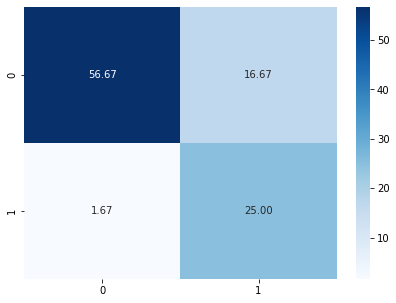

In [29]:
cf_matrix = metrics.confusion_matrix(y_test_pred.T, y_test)
plt.rcParams['figure.figsize'] = (7.0, 5.0)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

# with PCA

In [36]:
# Create a PCA object
pca = PCA(n_components=5)

# Fit the PCA model to the input data
pca.fit(X)
    
# Transform the input data to the first two principal components
X_pca = pca.transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [32]:
# Get number of features
n_features = X_train.shape[1]
print('Number of Features: {}'.format(n_features))

w, b = weightInitialization(n_features)
# Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_train, y_train.reshape(-1,1), learning_rate=0.00001,no_iterations=10000)
# Final Prediction
w = coeff['w']
b = coeff['b']
print('Optimized weights: {}'.format(w))
print('Optimized intercept: {}'.format(b))

final_train_pred = sigmoid(np.dot(w,X_train.T)+b)
final_test_pred = sigmoid(np.dot(w,X_test.T)+b)


Number of Features: 5
Optimized weights: [[0.00211368 0.02836639 0.01071551 0.01065813 0.00239152]]
Optimized intercept: -0.020044806666254012


## Evaluation Metrics for Classification with PCA.

In [33]:
y_train_pred = predict(final_train_pred, X_train.shape[0])
print('Training Accuracy             : {:.4f}'.format(metrics.accuracy_score(y_train_pred.T, y_train)))

y_test_pred = predict(final_test_pred, X_test.shape[0])
print('Test Accuracy                 : {:.4f}'.format(metrics.accuracy_score(y_test_pred.T, y_test)))
print('Logistic Regression f1-score  : {:.4f}'.format(metrics.f1_score(y_test_pred.T, y_test)))
print('Logistic Regression precision : {:.4f}'.format(metrics.precision_score(y_test_pred.T, y_test)))
print('Logistic Regression recall    : {:.4f}'.format(metrics.recall_score(y_test_pred.T, y_test)))
print("\n",metrics.classification_report(y_test_pred.T, y_test))

Training Accuracy             : 0.8285
Test Accuracy                 : 0.8000
Logistic Regression f1-score  : 0.6842
Logistic Regression precision : 0.5200
Logistic Regression recall    : 1.0000

               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        47
         1.0       0.52      1.00      0.68        13

    accuracy                           0.80        60
   macro avg       0.76      0.87      0.77        60
weighted avg       0.90      0.80      0.82        60



<AxesSubplot:>

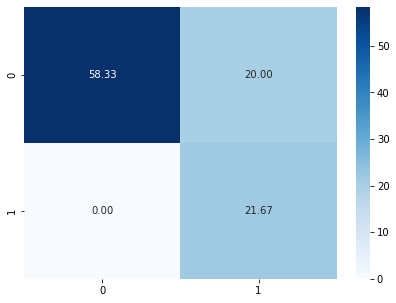

In [34]:
cf_matrix = metrics.confusion_matrix(y_test_pred.T, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

# Conclusion

Based on the evaluation metrics, it appears that using PCA as a preprocessing step in the logistic regression model has a small impact on the performance.

In terms of accuracy, the training accuracy of the first model without PCA is higher at 0.8577 compared to 0.8285 for the second model with PCA. However, the test accuracy for both models is the same at 0.8000.

The logistic regression component of both models has similar performance, with the second model having a slightly lower f1-score of 0.6842 compared to 0.7317 for the first model. The precision of the second model is also lower at 0.5200 compared to 0.6000 for the first model. However, the recall of the second model is higher at 1.0000 compared to 0.9375 for the first model.

In conclusion, while the use of PCA as a preprocessing step has a small impact on the performance of the logistic regression model, it may still be useful in certain scenarios where dimensionality reduction is necessary. Ultimately, the choice of whether to use PCA or not would depend on the specific problem being solved and the trade-off between model performance and computational complexity.

### Confusion matrix

#### without PCA
 Correctly predicted -> %81.67 (244 of 299 predict are correct)

> True Negative -> %56.67 -> Those who were predicted not to die and who did not die

> True Positive -> %25.00 -> Those who were predicted to die and who did die


 Wrong predicted-> %18.33 (50 of 299 predict are wrong)

> False Positive -> %16.67 -> Those who were predicted to die but who did not die

> False Negative -> %01.67 -> Those who were predicted to not die but who did die

#### with PCA
Correctly predicted -> %80 (239 of 299 predict are correct)

> True Negative -> %58.33 -> Those who were predicted not to die and who did not die

> True Positive -> %21.67 -> Those who were predicted to die and who did die

Wrong predicted-> %20 (60 of 299 predict are wrong)

> False Positive -> %20.00 -> Those who were predicted to die but who did not die

> False Negative -> %00.00 -> Those who were predicted to not die but who did die